# Natural Computing Assignment 1

### By: Luca Parolo (s1009497), Simge Ekiz (s4706757), Katrin Bujari (s1005213)

### Question 1:  
A generational GA has a population size of 100 individuals; uses fitness proportional
selection without elitisms; and after $t$ generation has a mean population fitness of 76.
There is one copy of the current best member, which has fitness 157.

##### (a)  What is the expectation for the number of copies of the best individual in the mating pool?    
**Solution:**   
<div style="padding: 20px;"> 
Sum of the fitness of all chromosomes will be  7600.  
Expectation of number of copies is given by the probability for the number of individual. In this case, Using roulette wheel selection gives chance of
<p style="text-align: center;"> $p = \frac{157}{76*100} \approx 0.0207$ </p>
of the best copy being selected per time.  
Therefore for the mating pool the expected number of copies of the best individual is 
    <p style="text-align: center;"> $100 * p \approx 2.07$ </p>
</div>

#####  (b)  What is the probability that there will be no copies of the best individual in the mating pool?        
**Solution:**   
<div style="padding: 20px;"> 
The probability sum always to $1$. Therefore the probability of no best individual is;
<p style="text-align: center;"> $q = 1$ - $\frac{157}{(76*100)} \approx 0.9793$  </p>
The probability of no copies of the best individual in the mating pool is the probability that all of the 100 individuals in the mating pool are different from the best. The probability that a different individual than the best is selected 100 times.
    <p style="text-align: center;"> $q^{100} \approx 0.123$ </p>
</div>

###  Question 2:  
Given the fitness function f(x) = x^2, calculate the probability of selecting the individuals x = 3, x = 5, and x = 7, using roulette wheel selection. Calculate the probability of selecting the same individuals when the fitness function is f1(x) = f(x)+8. Which fitness function yields a lower selection pressure?

**Solution:** 


| x\Function | f           | f1 |
|:---|-------------|----------------|
| 3          |  $x^2$ = 9  | $x^2$ + 8 = 17 |
| 5          |  $x^2$ = 25 | $x^2$ + 8 = 33 | 
| 5          |  $x^2$ = 25 | $x^2$ + 8 = 33 | 
| 7          |  $x^2$ = 49 | $x^2$ + 8 = 57 | 
| **sum**    | **83**      | **107**        | 

For the roulette wheel, we take the sum of the fitness of each individual. 
Given $f(x)=x^2$
A=3 is chosen, B=5 is chosen, C=7 is chosen.  
$\sum f=9+25+49=83$  

Therefore, 
- for x = 3 probability is $P(A)=9/83 \approx 0.1$ 
- for x = 5 probability is $P(B)=25/83 \approx 0.31$
- for x = 7 probability is $P(C)=49/83 \approx 0.59$

Given $f_1(x)=f(x)+8$, A= 3 is chosen, B=5 is chosen, C=7 is chosen. $\sum f_1=17+33+57=107$  

Therefore,
- for x = 3 probability is $P(A)=17/107 \approx 0.16$ 
- for x = 5 probability is $P(B)=33/107 \approx 0.31$
- for x = 7 probability is $P(C)=57/107 \approx 0.53$

Thus, with the fitness function $f_1(x)=x^2+8$ there is a lower selection pressure as the probability to be selected is higher for lower number (in this case x=3)

###  Question 3:  
 The Counting Ones problem amounts to find a bit string whose sum of its entries is maximum. This easy problem is used to illustrate the difference between Monte-Carlo search and a simple genetic algorithm.  
Implement a Monte-Carlo search algorithm for the Counting Ones problem.  

##### (a) Use n = 100 and for a run of 1500 iterations, plot the best fitness against the elapsed number of iterations.

**Solution:** 



In [2]:
#Import necessary libraries
import math
import sys
import random
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# defining parameters
n = 100
iterations = 1500

def counting_ones(sequence):
    return sum(sequence)
    
def generate_random_bit_sequence(n):
    # creating a bit sequence with length n
    sequence = np.random.randint(2, size=n) 
    return sequence

def MonteCarloSearch(obj_func, n, iteration):
    """Monte-Carlo search for binary problems works as follows.
    (a) Start with a random bit sequence.
    (b) If it is equal to the goal sequence then stop, otherwise repeat the process from step (a)."""
    best_fitnesses=[]
    best = ''
    for i in range(0,iteration):
        bitsequence = ''
        bitsequence = generate_random_bit_sequence(n)
        if obj_func(bitsequence) > obj_func(best):
            #if count of 1's is more than the old ones, assign the bitsequence as best
            best = bitsequence
        best_fitnesses.append(obj_func(best))
        if (obj_func(bitsequence) == n):
            print (result)
            print("Success!! Best fitness",best_fitness," found in individual number ",i )
            break;
    print ("Best solution found by MonteCarloSearch: ", best)
    print ("Best fitness: ", obj_func(best))
    return best_fitnesses

In [4]:
best_fitnesses = MonteCarloSearch(counting_ones, n, iterations)

Best solution found by MonteCarloSearch:  [1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0
 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0]
Best fitness:  67


#### Ploting the best fittness

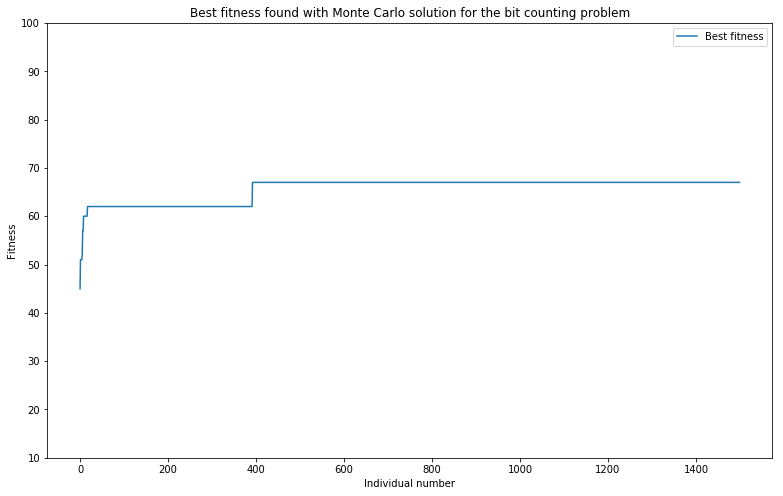

In [5]:
plt.figure(1,figsize=(13,8))
plt.plot(best_fitnesses,label="Best fitness")
plt.xlabel("Individual number")
plt.ylabel("Fitness")
plt.title("Best fitness found with Monte Carlo solution for the bit counting problem")
plt.ylim(10, 100)
plt.legend()
plt.show()

The result depends on whether you consider the result of every iteration a ‘found individual’, or only consider the last individual as a ‘found individual’. Based on how the question was phrased we assumed the first case was meant. Otherwise, the result would just be completely random.

##### (b) Now do ten runs. How many times the algorithm finds the optimum?  

**Solution:** 


Best solution found by MonteCarloSearch:  [0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0]
Best fitness:  66
Best solution found by MonteCarloSearch:  [0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0]
Best fitness:  67
Best solution found by MonteCarloSearch:  [1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0]
Best fitness:  68
Best solution found by MonteCarloSearch:  [1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1
 1 1 0 1 1 1 1 0

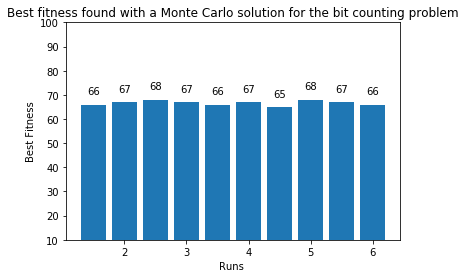

In [6]:
plt.figure(1,figsize=(13,8))
fig, ax = plt.subplots()
plt.xlabel("Runs ")
plt.ylabel("Best Fitness")
plt.title("Best fitness found with a Monte Carlo solution for the bit counting problem")
runs = range(1, 11)
performance = []
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

for i in range (1,11):
    to_plot=MonteCarloSearch(counting_ones, 100, 1500)
    performance.append(max(to_plot))
rects1 = ax.bar(runs, performance , align='center')
ax.set_xticklabels(runs)
plt.ylim(10, 100)
autolabel(rects1)
plt.show()

As we see, even with 10 runs the algorithm does not find an optimal solution

Because, the probability of finding the optimum is $\frac{1}{(2^n)} = \frac{1}{(2^{100})}$, and, we do 15000 iterations in total. 1500 * $\frac{1}{(2^{100})}$ Thus, the probability of finding the optimal solution is low.


###  Question 4:  

Implement a simple (1 + 1)-GA for solving the Counting Ones problem, using the same approach as with the Monte-Carlo search algorithm.

##### (a) Use n = 100 and a mutation rate p = 1/n. For a run of 1500 iterations, plot the best fitness against the elapsed number of iterations.
**Solution:**

Now we try to solve the same problem with a simple genetic algorithm


In [7]:
#Import necessary libraries
import math
import sys
import random
from collections import deque

# defining parameters
n = 100
iterations = 1500
p = 1/n

In [8]:
def GeneticAlgorithm(obj_func, n, iteration):
    """A simple (1 + 1)-GA for binary problems works as follows. 1
    (a) Randomly generate a bit sequence x.
    (b) Create a copy of x and invert each of its bits with probability p. Let xm be the result.
    (c) If xm is closer to the goal sequence than x then replace x with xm.
    (d) Repeat the process from step (b) with the new x until the goal sequence is reached."""
    #create a random parent of n bits
    parent = generate_random_bit_sequence(n) 
    #compute the probability of mutation in percentage (integer between 0 and 100)
    mutation_probability=((1/n)*100) 
    best_fitness_list=[]
    for i in range(0,iteration):
        bit_position = 0
        parent_copy = list(parent) #make a copy of the parent
        fitness_parent = obj_func(parent) #compute parent fitness
        best_fitness_list.append(fitness_parent) #save fitness
        for bit in parent_copy:
            ##compute the probability of mutation in percentage (integer between 0 and 100)
            x=random.uniform(0,100) 
            if  x <= mutation_probability: # if the just created random number is less than the mutation probbility
                #mutates 0 in a and 1 in 0
                if bit == 1: 
                    parent_copy[bit_position] = 0
                else:
                    parent_copy[bit_position] = 1
            else:
                parent_copy[bit_position] = parent_copy[bit_position]
            bit_position=bit_position+1
        fitness_parent_copy = obj_func(parent_copy) ##compute fitness of parent_copy
        ##if the fitness of the copy is better than the one of the parent, the copy is the new parent
        if fitness_parent_copy > fitness_parent: 
            parent=list(parent_copy)         
        else:
            parent=list(parent)  ##otherwise nothing is changed. Parent is still parent
         
        if (fitness_parent_copy == n): ##if we reach an optimal solution, breaks the loop
            print("Success!! Optimum solution found with fitness: ", fitness_parent_copy," at ITERATION: ", i)
            break
    if i==(iteration-1):    ##if we don't get an optimal solution, prints the best solution found
        print("We haven't found an optimal solution. The best solution is ", parent, "  with fitness: ", fitness_parent,"/",n)
    return best_fitness_list


In [9]:
to_plot = GeneticAlgorithm(counting_ones, 100, 1500)

Success!! Optimum solution found with fitness:  100  at ITERATION:  801


With n=100 and 1500 iteration the function has good result , but doesn't always find the optimal solution. However, even if it doesn't, it reach a much better result compared to the Monte Carlo solution

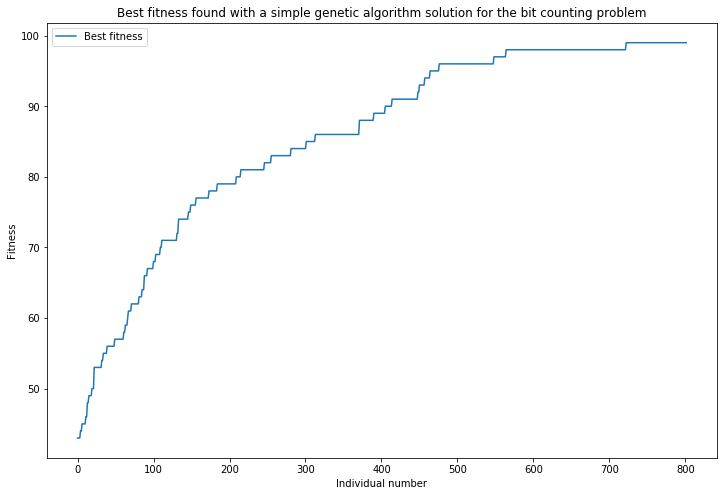

In [10]:
plt.figure(1,figsize=(12,8))
plt.plot(to_plot,label="Best fitness")
plt.xlabel("Individual number")
plt.ylabel("Fitness")
plt.title("Best fitness found with a simple genetic algorithm solution for the bit counting problem")
plt.legend()
plt.show()

###### (b) Now do ten runs. How many times the algorithm finds the optimum?

Success!! Optimum solution found with fitness:  100  at ITERATION:  1052
Success!! Optimum solution found with fitness:  100  at ITERATION:  1437
We haven't found an optimal solution. The best solution is  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   with fitness:  99 / 100
Success!! Optimum solution found with fitness:  100  at ITERATION:  1253
Success!! Optimum solution found with fitness:  100  at ITERATION:  1266
Success!! Optimum solution found with fitness:  100  at ITERATION:  822
Success!! Optimum solution found with fitness:  100  at ITERATION:  1152
Success!! Optimum solution found with fitness:  100  at ITERATION:  967
Success!! Optimum solution found with fitness:  100  at ITERATION:  872
Success!! Optimum solution found

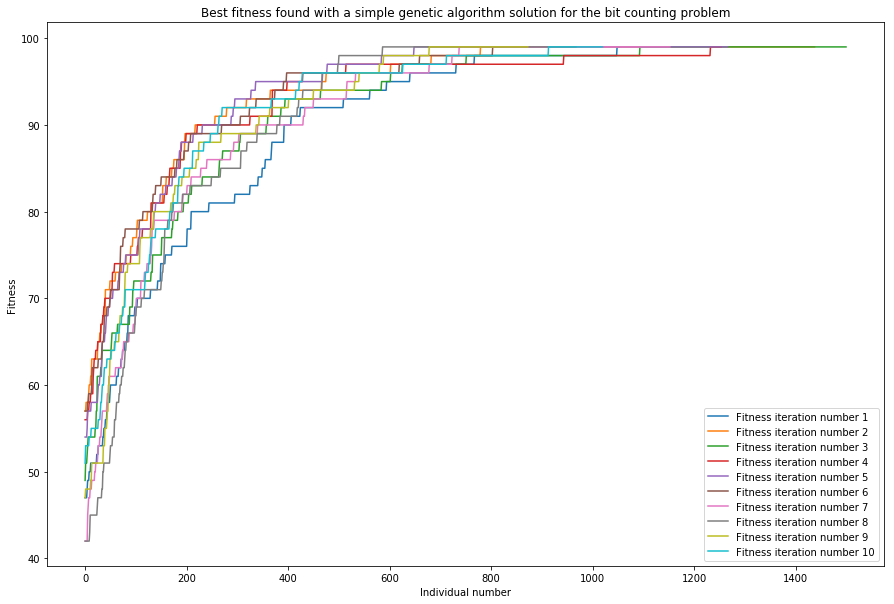

In [11]:
plt.figure(1,figsize=(15,10))
plt.xlabel("Individual number")
plt.ylabel("Fitness")
plt.title("Best fitness found with a simple genetic algorithm solution for the bit counting problem")
for i in range (1,11):
    to_plot = GeneticAlgorithm(counting_ones, 100, 1500)
    legend="Fitness iteration number "+str(i)
    plt.plot(to_plot,label=legend)
plt.legend()
plt.show()

As we see in this 10 runs, in this case we have 9 optimal solution

##### (c) Is there a difference in performance compared to the Monte-Carlo Search algorithm? Justify your answer.

Yes, there is a difference in terms of the performance, due to the nature of the (1+1)-GA. Performance of GA is much better than Monte Carlo(MC) Algorithm. Moreover, GA converges to the optimal solution faster than MC. Monte Carlo algorithm is starting from the scratch in every iteration. Although GA uses modifications towards best solution at every iteration by using the best individual found so far as its starting point. This increase the probability of finding best indivudual in each iteration. The probability of finding a better individual at a given iteration decreases when the fitness gets closer to the optimum. The graph of Genetic Algorithm is increasing rapidly at first then it takes time to inscrease the fitness score, as can be seen in Exercise 4.

###  Question 5:  

(Genetic Programming) Give a suitable function, terminal set and s-expression for the following logical formula:  

(x ∧ true) → ((x ∨ y) ∨ (z ↔ (x ∧ y))).

**Solution:**


#### -Function set: $\left\{\wedge,\rightarrow,\vee,\longleftrightarrow\right\}$

#### -Terminal set:$\left\{ x, true, y ,z \right\}$

#### -s-expression:$(\:\rightarrow \: (\: \wedge \:x \:true\:)\:(\:\vee\:(\:\vee \:x \:y \:)\:(\:\longleftrightarrow\: z \:( \:\wedge \:x \:y\:)\:)\:)\:)  $ 

### Question 6

###  Question 6:  

(Genetic Programming) Implement a GP program for finding a symbolic expression that fits the following data:

<img src="data.png" alt="Drawing" style="width: 30%;"/>
###### (a) Plot the best of generation fitness (y-axis) versus generation (x-axis).  

- population size: 1000
- function set: {+, −, ∗, log, exp, sin, cos, div},
- terminal set: x,
- number of generations 50,
- crossover probability 0.7,
- mutation probability: 0,
- fitness: - sum of absolute errors.

**Solution:**


http://gplearn.readthedocs.io/en/stable/reference.html#gplearn.genetic.SymbolicRegressor
http://gplearn.readthedocs.io/en/stable/examples.html#example-1-symbolic-regressor

In [3]:
import math
import gplearn
from gplearn import genetic
import numpy as np

In [4]:
X=[-1,-0.9,-0.8,-.7,-.6,-.5,-.4,-.3,-.2,-.1,0.0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
Y = [0.0,-.1629,-.2624,-.3129,-.3264,-.3125,-.2784,-.2289,-.1664,-0.0909,0.0,.1111,.2496,.4251,.6496,.9375,1.3056,1.7731,2.3616,3.0951,4.0000]

In [5]:
X=np.reshape(X,(-1,1))
Y=np.reshape(Y,(-1,1))

We make the exponential function to pass as parameter in the function_set, as this is not already built in gplearn

In [6]:
def _protected_exponent(x1):
    with np.errstate(over='ignore'):
        return np.where(np.abs(x1) < 100, np.exp(x1), 0.)

Then we make it into a gplearn compatible function

In [7]:
exp = gplearn.functions.make_function(function=_protected_exponent,name='exp',arity=1)

We define our fitness measure as the sum of absolute errors

In [8]:
def _sae(y, y_pred, w):
    """Calculate the sum absolute error."""
    return np.sum(np.abs(y-y_pred))

We make the fitness function gplearn compatible

In [9]:
sae =gplearn.fitness.make_fitness(_sae, greater_is_better=False)

Now with our parameters, we can build our SymbolicRegressor

In [10]:
est_gp = gplearn.genetic.SymbolicRegressor(population_size=1000,
                           generations=50,function_set=("add","sub","mul","div","log","sin","cos",exp),metric=sae,stopping_criteria=0.00,
                           p_crossover=0.7, p_subtree_mutation=0.0,
                           p_hoist_mutation=0.00, p_point_mutation=0.0,
                           max_samples=1.0, verbose=1,const_range=(0,0),
                           parsimony_coefficient=0.00, random_state=0)
est_gp.fit(X, Y.ravel())

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.98 1.85210017339e+12       16    6.17242426536              N/A     16.24s
   1    12.84    31.1863815545        6    4.24698194677              N/A      1.51m
   2    16.95     19.370017494       17    1.50641115585              N/A      1.92m
   3     14.0     12.120782284       17    1.50641115585              N/A      2.21m
   4    12.72    12.8221318315       18    1.50641115585              N/A      2.25m
   5    17.91    15.3714369169       16    1.50641115585              N/A      2.32m
   6    18.91    11.6442263717       10    1.50641115585              N/A      2.34m
   7    19.43    10.0740145596       25    1.50641115585              N/A      2.39m
   8    20.28    16.9115621946       19    1.50641115585              N/A 

SymbolicRegressor(const_range=(0, 0),
         function_set=('add', 'sub', 'mul', 'div', 'log', 'sin', 'cos', <gplearn.functions._Function object at 0x000002A5A45F25C0>),
         generations=50, init_depth=(2, 6), init_method='half and half',
         max_samples=1.0,
         metric=<gplearn.fitness._Fitness object at 0x000002A5A45F2BE0>,
         n_jobs=1, p_crossover=0.7, p_hoist_mutation=0.0,
         p_point_mutation=0.0, p_point_replace=0.05,
         p_subtree_mutation=0.0, parsimony_coefficient=0.0,
         population_size=1000, random_state=0, stopping_criteria=0.0,
         tournament_size=20, verbose=1, warm_start=False)

We can print the found function:

In [63]:
print (est_gp._program)

sub(mul(div(sub(exp(X0), exp(0.000)), exp(0.000)), exp(sin(X0))), sin(div(sin(div(mul(sin(div(sin(exp(X0)), exp(sin(div(sin(div(exp(sin(X0)), add(exp(0.000), sub(0.000, X0)))), exp(X0)))))), exp(sin(X0))), exp(log(sub(mul(sub(log(mul(sub(sin(div(sin(div(mul(sin(div(sin(exp(X0)), exp(sin(div(sin(div(exp(sin(X0)), add(exp(0.000), sub(0.000, X0)))), exp(X0)))))), exp(exp(sin(X0)))), exp(log(sub(mul(sub(log(mul(sub(log(0.000), exp(exp(div(X0, 0.000)))), mul(div(sub(sin(div(exp(sin(X0)), add(exp(0.000), sub(0.000, X0)))), exp(0.000)), exp(0.000)), exp(div(X0, 0.000))))), exp(exp(div(X0, 0.000)))), div(mul(div(log(0.000), mul(sub(sin(log(0.000)), sub(exp(X0), exp(sin(X0)))), exp(sin(sin(div(log(0.000), exp(sub(exp(X0), sin(X0))))))))), exp(sin(X0))), 0.000)), div(X0, 0.000)))))), exp(div(log(0.000), sin(X0))))), exp(exp(exp(0.000)))), mul(div(sub(sin(div(exp(sin(X0)), add(exp(0.000), sub(0.000, X0)))), exp(0.000)), exp(0.000)), exp(div(X0, 0.000))))), exp(exp(exp(div(log(0.000), sin(X0))))))

As we see the function is pretty huge!!!

For simplicity we have copied the relevant info in a txt file and sliced it to obtain the best fitness for each population

In [64]:
pieces=[]
with open('printed_info_no_parsimony.txt','r') as f:
    for line in f:
        for word in line.split():
            if (word!="N/A"):
                pieces.append(word)


In [65]:
best_fitness=[]
best_fitness.append(float(pieces[4]))

for i in range(4,len(pieces),6):
    best_fitness.append(float(pieces[i]))

We do the same for the size

In [66]:
best_size=[]
best_size.append(int(pieces[3]))

for i in range(3,len(pieces),6):
    best_size.append(int(pieces[i]))

Plot the following:

(a) best of generation fitness (y-axis) versus generation (x-axis).

(b) best of generation size (y-axis) versus generation (x-axis).

We make the first plot

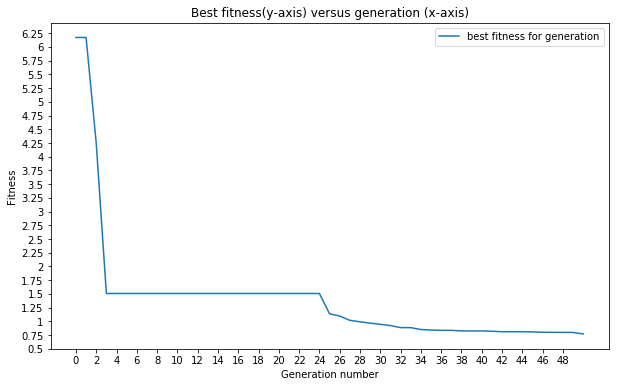

In [97]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(10,6))

ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_ticks(np.arange(0, 8, 0.25))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_ticks(np.arange(0, 50, 2))

plt.xlabel("Generation number")
plt.ylabel("Fitness")
plt.title("Best fitness(y-axis) versus generation (x-axis)")
plt.plot(best_fitness,label="best fitness for generation")
plt.legend()
plt.show()

We make the second plot

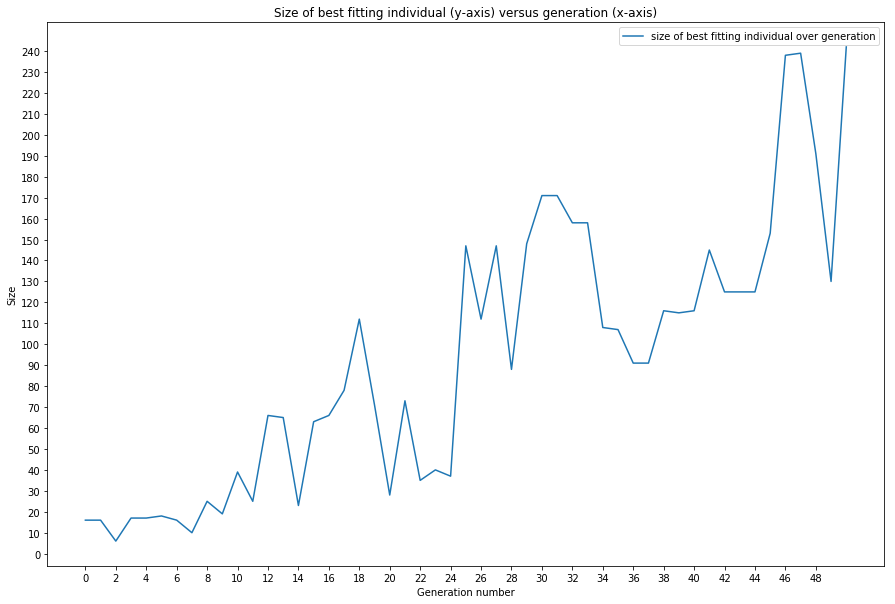

In [98]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(15,10))

ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_ticks(np.arange(0, 250, 10))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_ticks(np.arange(0, 50, 2))

plt.xlabel("Generation number")
plt.ylabel("Size")
plt.title("Size of best fitting individual (y-axis) versus generation (x-axis)")
plt.plot(best_size,label="size of best fitting individual over generation")
plt.legend()
plt.show()

As we note we have the so called BLOAT which is increase in program size that is not accompanied by any corresponding increase in fitness. In this case it's not completely true, as the fitness gest better until the last generation where we register the best fitness. However we may prefer to have a shorter function with a decent fitness , rather than a very long function with a slightly better fitness. If this would be the case we can use the parsimony pressure , which penalize the fitness of large functions. We can try to do so just changing the parameter parsimony_coefficient which is now set to 0.

We change the parsimony coefficient and set it to 0.01

In [80]:
est_gp = gplearn.genetic.SymbolicRegressor(population_size=1000,
                           generations=50,function_set=("add","sub","mul","div","log","sin","cos",exp),metric=sae,stopping_criteria=0.00,
                           p_crossover=0.7, p_subtree_mutation=0.0,
                           p_hoist_mutation=0.00, p_point_mutation=0.0,
                           max_samples=1.0, verbose=1,const_range=(0,0),
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X, Y.ravel())

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.98 1.85210017339e+12       16    6.17242426536              N/A     16.07s
   1    11.36    31.0792456874        6    4.24698194677              N/A      1.42m
   2    15.28    18.4733469598       19    1.50641115585              N/A      1.76m
   3    12.38    12.5261730943       19    1.50641115585              N/A      2.00m
   4    10.59    13.0689850012       17    1.50641115585              N/A      2.01m
   5    15.07    27.6696847476       19    1.50641115585              N/A      2.07m
   6    14.33    12.8365686797       10    1.50641115585              N/A      2.09m
   7    10.73    15.3219823936       11    1.50641115585              N/A      2.14m
   8     9.55    13.4352858346       10    1.50641115585              N/A 

SymbolicRegressor(const_range=(0, 0),
         function_set=('add', 'sub', 'mul', 'div', 'log', 'sin', 'cos', <gplearn.functions._Function object at 0x000002DEBFACE9E8>),
         generations=50, init_depth=(2, 6), init_method='half and half',
         max_samples=1.0,
         metric=<gplearn.fitness._Fitness object at 0x000002DEC633FA20>,
         n_jobs=1, p_crossover=0.7, p_hoist_mutation=0.0,
         p_point_mutation=0.0, p_point_replace=0.05,
         p_subtree_mutation=0.0, parsimony_coefficient=0.01,
         population_size=1000, random_state=0, stopping_criteria=0.0,
         tournament_size=20, verbose=1, warm_start=False)

We can print the found function:

In [81]:
print (est_gp._program)

mul(sub(exp(X0), exp(0.000)), exp(sin(X0)))


Now the function is much shorter! We plot again the relevant info we found

For simplicity we have copied the relevant info in a txt file and sliced it to obtain the best fitness for each population

In [90]:
pieces=[]
with open('printed_info_parsimony.txt','r') as f:
    for line in f:
        for word in line.split():
            if (word!="N/A"):
                pieces.append(word)

In [91]:
best_fitness_parsimony=[]
best_fitness_parsimony.append(float(pieces[4]))

for i in range(4,len(pieces),6):
    best_fitness_parsimony.append(float(pieces[i]))

We do the same for the size

In [92]:
best_size_parsimony=[]
best_size_parsimony.append(int(pieces[3]))

for i in range(3,len(pieces),6):
    best_size_parsimony.append(int(pieces[i]))

Plot the following:

(a) best of generation fitness (y-axis) versus generation (x-axis).

(b) best of generation size (y-axis) versus generation (x-axis).

We make the first plot

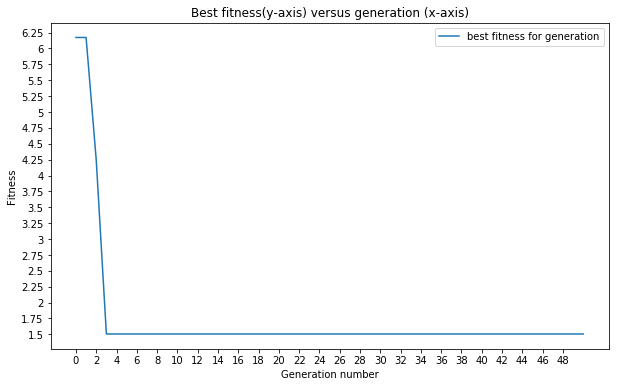

In [95]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(10,6))

ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_ticks(np.arange(0, 8, 0.25))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_ticks(np.arange(0, 50, 2))

plt.xlabel("Generation number")
plt.ylabel("Fitness")
plt.title("Best fitness(y-axis) versus generation (x-axis)")
plt.plot(best_fitness_parsimony,label="best fitness for generation")
plt.legend()
plt.show()

We make the second plot

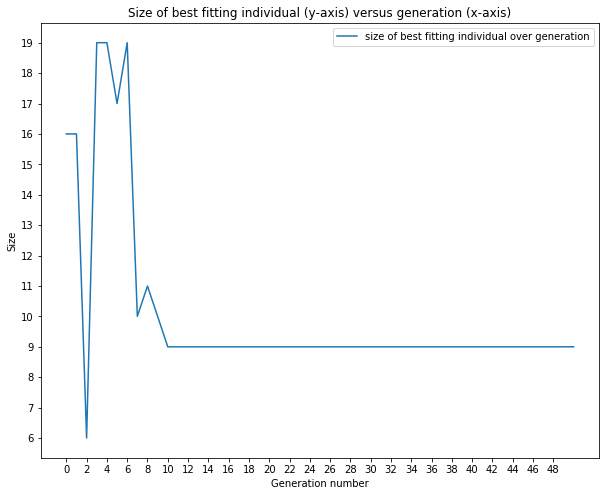

In [96]:

from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(10,8))

ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_ticks(np.arange(0, 20, 1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_ticks(np.arange(0, 50, 2))

plt.xlabel("Generation number")
plt.ylabel("Size")
plt.title("Size of best fitting individual (y-axis) versus generation (x-axis)")
plt.plot(best_size_parsimony,label="size of best fitting individual over generation")
plt.legend()
plt.show()